# Pre-processing Overlay data for WaDE upload.
- Purpose: To preprocess state overlay data into one main file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/WaDE Data Folder/California/Overlays" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/WaDE Data Folder/California/Overlays


## Overlay Area Data #1

In [3]:
# Input File
inputFile = "RawInputData/shapefiles/2019_SGMA_Basins.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "ov" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/2019_SGMA_Basins.zip', compression=dict(method='zip', archive_name='2019_SGMA_Basins.csv'), index=False)

print(len(dfin1))
dfin1.sort_values(by=['Basin_Numb']).head(3)

515


,Basin_Numb,Basin_Subb,Basin_Name,Basin_Su_1,Priority,GlobalID,Shape_Leng,Shape_Area,geometry,WaDEUUID
399,1-001,1-001,SMITH RIVER PLAIN,SMITH RIVER PLAIN,Very Low,{A82D029C-E795-462D-8DBB-3C20979DDB1C},129434.23829,294997508.05500,"POLYGON ((-13826156.291 5153100.783, -13825633...",ov399
417,1-002,1-002.01,KLAMATH RIVER VALLEY,KLAMATH RIVER VALLEY - TULELAKE,Medium,{0221C1D2-25AE-4A1A-966A-CB67C61AD079},131099.64762,808067584.89800,"POLYGON ((-13517708.944 5160548.678, -13517351...",ov417
397,1-002,1-002.02,KLAMATH RIVER VALLEY,KLAMATH RIVER VALLEY - LOWER KLAMATH,Very Low,{40BABA70-71DB-468B-9D2F-26492806EFDC},203381.80002,551170129.01700,"POLYGON ((-13566631.159 5160116.296, -13566429...",ov397


In [4]:
# Input File
inputFile = "RawInputData/SGMA Basin Prioritization Statewide Summary Table.zip"
dfin2 = pd.read_csv(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin2:
    dfin2['WaDEUUID'] = "ov" + dfin2.index.astype(str)
    dfin2.to_csv('RawInputData/SGMA Basin Prioritization Statewide Summary Table.zip', compression=dict(method='zip', archive_name='SGMA Basin Prioritization Statewide Summary Table.csv'), index=False)

print(len(dfin2))
dfin2.sort_values(by=['Basin ID']).head(3)

515


,Basin ID,Basin Name,Subbasin Name,Basin Area (Acre),Basin Area \n(Sq. Mile),RO,Hydrologic Region,Basin Status,Phase \n,Active Groundwater Level Monitoring\n\n0 = No\n1 = Yes,\nGroundwater Adjudicated\n\n\n0=No\n1=Yes,Groundwater Acre-feet\nNon-adjudicated portion of basin\n,Groundwater Acre-feet\nadjudicated portion of basin\n,Est. 2014 Population in\nNon-adjudicated portion of basin\n,Est. 2014 Population in\nadjudicated portion of basin\n,Out of Basin Groundwater transfers (in-lieu)\n\n0=No\n1=Yes,Year with highest transfer,Highest transfer (AF) since 2009,Critical Overdraft (B118-16)\n\n0=No\n1=Yes,Final Priority Points,Final Basin Priority,2010 Population\n\n,2010 Population/sq. mile\n,Component 1 Priority Points,Projected 2030 Population\n\n\n\n,Projected 2030 Population % Change\n\n\n,Interim Growth\nRank,Adjustment\n\nZero 2010 Pop\n(0 Priority Points)\n\n,Adjustment\n\nNegative or 0 Growth\n(0 Priority Points)\n\n,"Adjustment\nPostive Growth and 2010 Population < 1,000\n(0 Priority Points)","Adjustment\nDensity \n< 50 and 2010 Population <= 25,000\n(0 Priority Points)",Component 2 Priority Points,Public Supply Wells\n\n,Public Supply Well\n/sq. mile\n,Component 3 Priority Points,Production Wells\n\n,Production Well\n/Sq. mile\n,Component 4\nPriority Points,Irrigated Acres\n\n,Irrigated Acreage /Sq. Mile\n,Component 5\nPriority Points,AG GW \nBasin\n(AF),AG SW \nBasin \n(AF),AG\nTOTAL\nApplied Water\nBasin\n(AF),AG GW \nBasin %,AG SW\nBasin %,Urban GW Volume (AF),Urban SW Volume (AF),Urban Purchased Volume (AF),Urban Total Water Use Volume (AF),Urban GW Percent Of Total (%),Urban SW & Purchased Percent Of Total (%),Other Groundwater,Other Surface Water,Basin Total GW [Ag + Urban] (AF),Basin Total SW & Purchased [Ag + Urban] (AF),BASIN TOTAL APPLIED WATER (AF),BASIN GW PERCENT OF TOTAL (%),BASIN SW & PURCHASED PERCENT OF TOTAL (%),Groundwater\n(Acre-feet)\n,Groundwater Acre-feet /Acre,Component 6a Points\n,Groundwater % of total supply\n,Component 6b Points\n,Component 6 Priority Points\n,Component 7.a\n\nDeclining GW Levels\nPoints,GWL Decline Comment(s)/Source(s),Component 7.b\n\nSubsidence Points\n,Subsidence Comment(s)/Source(s),Component 7.c\n\nSalt Intrusion Points,Saline Intrusion Comment(s)/Source(s),WQ- Number of detects used in analysis,WQ- Number of MCL exceedances used in analysis,WQ- Average Relative MCL Exceedance - Data total,WQ- Average Relative MCL Exceedance - Points,WQ - Total Number of unique wells with an MCL Excd between 1/1/2000 and 4/1/2017,WQ - Number of Wells with Exceedance per active PSW\n(min = 1),"WQ - Number of Wells with Exceedance per active PSW,\nPoints",Total WQ raw points\n(7.c.1 + 7.c.2),Component 7.d\nPoints\n\nWater Quality,\nComponent 7\n\nTotal Points\n\n,Component 7\n\n Priority Points\n,Vegetation Polygons Count (NCCAG),Vegetation Polygons Area (Ac.),Wetland Polygons Count (NCCAG),Wetland Polygons Area (Ac.),Polygon Total Count (NCCAG),Total Area of Polygons,"Habitat\nExist\n\n1 = Yes,\nBlank = No","Streamflow\nExist\n\n1 = Yes,\nBlank = No",Total\nPotential\n8a Points,"8a Part B\n\nM = Monitoring, DGWLs, >0.16AF\nNM = No Monitoring, >0.16AF","8a Part C\n\n1 = Yes,\n0 = No",8a Part C Comments\n,Component 8a Priority Points,8b Comments,Component 8b Priority Points,Interim Priority Points\nComponents\n(#1 - #8.b),"Component\n(8.c.1)\nAdjustment = 0\n\nGroundwater < 2,000 Acre-feet?\n\n","Component\n(8.c.2)\nAdjustment = 0\n\n\nGroundwater <= 9,500 acre-feet and No Doc Impacts?","Component\n(8.c.3)\nAdjustment = 0\n\nAdjudicated and groundwater of non-Adjudicated portion <= 9,500 acre-feet",Interim Priority Points\nComponents\n(#1 - #8.c),Component\n (8.d.1)\nCritical Overdraft \nInterim Priority Points\n\nCOD = 40 \n\n,Component\n(8.d.2)\n \nOut of Basin groundwater exports and substitution transfers,Total Priority Points\n(#1 through #8.d),\nSGMA 2019 Basin Prioritization\n\nBasin\nPriority,WaDEUUID
0,1-001,Smith River Plain,,40434.48606,63.17888,NRO,North Coast,Final,1,1,0,0,0,

In [5]:
# left merge table summary to basins shp, use subasin ID

dfin1 = dfin1.merge(dfin2[['Basin ID', 'RO']], left_on='Basin_Subb', right_on='Basin ID', how='left').replace(np.nan, "")
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326) # Realign Geometry Projection
print(len(dfin1))
dfin1.head(1)

515


,Basin_Numb,Basin_Subb,Basin_Name,Basin_Su_1,Priority,GlobalID,Shape_Leng,Shape_Area,geometry,WaDEUUID,Basin ID,RO
0,9-029,9-029,POTRERO VALLEY,POTRERO VALLEY,Very Low,{BA840110-5DB5-44A9-85AF-66FD1E9AE423},25722.24136,11550262.46010,"POLYGON ((-116.57593 32.65091, -116.57489 32.6...",ov0,9-029,SRO


In [6]:
# For Creating OversightAgency

OversightAgencyDict = {
    "NRO" : "Northern Region Office",
    "SRO" : "Southern Region Office",
    "NCRO" : "North Central Region Office",
    "SCRO" : "South Central Region Office",}

def CreateOversightAgency(colrowValue):
    if colrowValue == "" or pd.isnull(colrowValue):
        outList = ""
    else:
        String1 = colrowValue
        try:
            outList = OversightAgencyDict[String1]
        except:
            outList = "Unspecified"
    return outList

dfin1['in_OversightAgency'] = dfin1.apply(lambda row: CreateOversightAgency(row['RO']), axis=1)
dfin1['in_OversightAgency'].value_counts()

in_OversightAgency
Southern Region Office         227
Northern Region Office         129
North Central Region Office     81
South Central Region Office     77
Unspecified                      1
Name: count, dtype: int64

In [7]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "08/26/2021"
df['in_Year'] = "2021"

# Organization Info
df['in_OrganizationUUID'] = "CAov_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = 4326
df['in_ReportingUnitName'] = dfin1['Basin_Name']
df['in_ReportingUnitNativeID'] = "ca" + dfin1['Basin_Subb']
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Sustainable Groundwater Management Act Basin"
df['in_ReportingUnitUpdateDate'] = "12/18/2019"
df['in_StateCV'] = "CA"
df['in_Geometry'] = dfin1['geometry']

# RegulatoryOverlay Info
df['in_OversightAgency'] = dfin1['in_OversightAgency']
df['in_RegulatoryDescription'] = "Each basin’s priority (e.g., high, medium, low, or very low) determines which provisions of California Statewide Groundwater Elevation Monitoring (CASGEM) and the Sustainable Groundwater Management Act (SGMA) apply.  SGMA requires medium- and high-priority basins to develop groundwater sustainability agencies (GSAs), develop groundwater sustainability plans (GSPs) and manage groundwater for long-term sustainability."
df['in_RegulatoryName'] = dfin1['Basin_Name']
df['in_RegulatoryOverlayNativeID'] = dfin1['Basin_Subb']
df['in_RegulatoryStatusCV'] = "Final"
df['in_RegulatoryStatute'] = dfin1['Priority']
df['in_RegulatoryStatuteLink'] = "https://water.ca.gov/Programs/Groundwater-Management/Basin-Prioritization"
df['in_StatutoryEffectiveDate'] = "1/1/2019"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Sustainable Groundwater Management Act Basin"
df['in_WaterSourceTypeCV'] = "Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

515


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,ov0,08/26/2021,2021,CAov_O1,4326,POTRERO VALLEY,ca9-029,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.57593 32.65091, -116.57489 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",POTRERO VALLEY,9-029,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,1/1/2019,,Sustainable Groundwater Management Act Basin,Groundwater
1,ov1,08/26/2021,2021,CAov_O1,4326,JACUMBA VALLEY,ca7-047,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.18348 32.65479, -116.18130 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",JACUMBA VALLEY,7-047,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,1/1/2019,,Sustainable Groundwater Management Act Basin,Groundwater
2,ov2,08/26/2021,2021,CAov_O1,4326,CAMPO VALLEY,ca9-028,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.48020 32.63985, -116.47931 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",CAMPO VALLEY,9-028,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,1/1/2019,,Sustainable Groundwater Management Act Basin,Groundwater
3,ov3,08/26/2021,2021,CAov_O1,4326,DAVIES VALLEY,ca7-061,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.01208 32.69585, -116.01309 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",DAVIES VALLEY,7-061,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,1/1/2019,,Sustainable Groundwater Management Act Basin,Groundwater
4,ov4,08/26/2021,2021,CAov_O1,4326,COTTONWOOD VALLEY,ca9-027,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.49138 32.76155, -116.49128 32.7...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",COTTONWOOD VALLEY,9-027,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,1/1/2019,,Sustainable Groundwater Management Act Basin,Groundwater


## Concatenate DataFrames together

In [8]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

515


## Clean Data / data types

In [9]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [10]:
outdf['in_ReportingUnitName'] = outdf.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['POTRERO VALLEY', 'JACUMBA VALLEY', 'CAMPO VALLEY',
       'DAVIES VALLEY', 'COTTONWOOD VALLEY', 'EL CAJON VALLEY',
       'CANEBRAKE VALLEY', 'COYOTE WELLS VALLEY', 'POWAY VALLEY',
       'SAN DIEGUITO CREEK', 'MASON VALLEY', 'SAN ELIJO VALLEY',
       'VALLECITO-CARRIZO VALLEY', 'SANTA MARIA VALLEY', 'YUMA VALLEY',
       'BATIQUITOS LAGOON VALLEY', 'OGILBY VALLEY', 'SAN MARCOS AREA',
       'ESCONDIDO VALLEY', 'YAQUI WELL AREA', 'PAMO VALLEY',
       'SAN FELIPE VALLEY', 'RANCHITA TOWN AREA', 'AMOS VALLEY',
       'WARNER VALLEY', 'IMPERIAL VALLEY', 'SAN ONOFRE VALLEY',
       'WEST SALTON SEA', 'SAN MATEO VALLEY', 'COLLINS VALLEY',
       'EAST SALTON SEA', 'BUCK RIDGE FAULT VALLEY', 'TERWILLIGER VALLEY',
       'ARROYO SECO VALLEY', 'VANDEVENTER FLAT', 'CAHUILLA VALLEY',
       'TEMECULA VALLEY', 'SAN JUAN VALLEY', 'CHOCOLATE VALLEY',
       'HEMET LAKE VALLEY', 'OROCOPIA VALLEY', 'PALO VERDE VALLEY',
       'PALO VERDE MESA', 'COACHELLA VALLEY', 'PLEASANT VALLEY',
       '

In [11]:
outdf['in_RegulatoryDescription'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Each basin’s priority (e.g., high, medium, low, or very low) determines which provisions of California Statewide Groundwater Elevation Monitoring (CASGEM) and the Sustainable Groundwater Management Act (SGMA) apply.  SGMA requires medium- and high-priority basins to develop groundwater sustainability agencies (GSAs), develop groundwater sustainability plans (GSPs) and manage groundwater for long-term sustainability.'],
      dtype=object)

In [12]:
outdf['in_RegulatoryName'] = outdf.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['POTRERO VALLEY', 'JACUMBA VALLEY', 'CAMPO VALLEY',
       'DAVIES VALLEY', 'COTTONWOOD VALLEY', 'EL CAJON VALLEY',
       'CANEBRAKE VALLEY', 'COYOTE WELLS VALLEY', 'POWAY VALLEY',
       'SAN DIEGUITO CREEK', 'MASON VALLEY', 'SAN ELIJO VALLEY',
       'VALLECITO-CARRIZO VALLEY', 'SANTA MARIA VALLEY', 'YUMA VALLEY',
       'BATIQUITOS LAGOON VALLEY', 'OGILBY VALLEY', 'SAN MARCOS AREA',
       'ESCONDIDO VALLEY', 'YAQUI WELL AREA', 'PAMO VALLEY',
       'SAN FELIPE VALLEY', 'RANCHITA TOWN AREA', 'AMOS VALLEY',
       'WARNER VALLEY', 'IMPERIAL VALLEY', 'SAN ONOFRE VALLEY',
       'WEST SALTON SEA', 'SAN MATEO VALLEY', 'COLLINS VALLEY',
       'EAST SALTON SEA', 'BUCK RIDGE FAULT VALLEY', 'TERWILLIGER VALLEY',
       'ARROYO SECO VALLEY', 'VANDEVENTER FLAT', 'CAHUILLA VALLEY',
       'TEMECULA VALLEY', 'SAN JUAN VALLEY', 'CHOCOLATE VALLEY',
       'HEMET LAKE VALLEY', 'OROCOPIA VALLEY', 'PALO VERDE VALLEY',
       'PALO VERDE MESA', 'COACHELLA VALLEY', 'PLEASANT VALLEY',
       '

In [13]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

<DatetimeArray>
['2019-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

# Geometry Data
- For attaching geometry to overlay reporting unit area info.

#### Overlay Area #1 shapefile info

In [14]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

515


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV,geometry
0,ov0,08/26/2021,2021,CAov_O1,4326,POTRERO VALLEY,ca9-029,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.57593 32.65091, -116.57489 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",POTRERO VALLEY,9-029,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,2019-01-01,,Sustainable Groundwater Management Act Basin,Groundwater,"POLYGON ((-116.57593 32.65091, -116.57489 32.6..."
1,ov1,08/26/2021,2021,CAov_O1,4326,JACUMBA VALLEY,ca7-047,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.18348 32.65479, -116.18130 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",JACUMBA VALLEY,7-047,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,2019-01-01,,Sustainable Groundwater Management Act Basin,Groundwater,"POLYGON ((-116.18348 32.65479, -116.18130 32.6..."
2,ov2,08/26/2021,2021,CAov_O1,4326,CAMPO VALLEY,ca9-028,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.48020 32.63985, -116.47931 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",CAMPO VALLEY,9-028,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,2019-01-01,,Sustainable Groundwater Management Act Basin,Groundwater,"POLYGON ((-116.48020 32.63985, -116.47931 32.6..."
3,ov3,08/26/2021,2021,CAov_O1,4326,DAVIES VALLEY,ca7-061,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.01208 32.69585, -116.01309 32.6...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",DAVIES VALLEY,7-061,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,2019-01-01,,Sustainable Groundwater Management Act Basin,Groundwater,"POLYGON ((-116.01208 32.69585, -116.01309 32.6..."
4,ov4,08/26/2021,2021,CAov_O1,4326,COTTONWOOD VALLEY,ca9-027,,Sustainable Groundwater Management Act Basin,12/18/2019,CA,"POLYGON ((-116.49138 32.76155, -116.49128 32.7...",Southern Region Office,"Each basin’s priority (e.g., high, medium, low...",COTTONWOOD VALLEY,9-027,Final,Very Low,https://water.ca.gov/Programs/Groundwater-Mana...,2019-01-01,,Sustainable Groundwater Management Act Basin,Groundwater,"POLYGON ((-116.49138 32.76155, -116.49128 32.7..."


<Axes: >

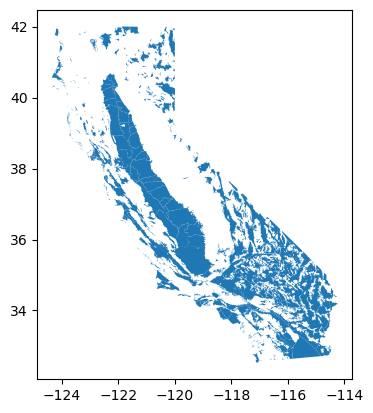

In [15]:
# plot shape info to map
gdfin1.plot()

In [16]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] =  gdfin1["in_ReportingUnitNativeID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

515


,in_ReportingUnitNativeID,geometry
0,ca9-029,"POLYGON ((-116.57593 32.65091, -116.57489 32.6..."
1,ca7-047,"POLYGON ((-116.18348 32.65479, -116.18130 32.6..."
2,ca9-028,"POLYGON ((-116.48020 32.63985, -116.47931 32.6..."
3,ca7-061,"POLYGON ((-116.01208 32.69585, -116.01309 32.6..."
4,ca9-027,"POLYGON ((-116.49138 32.76155, -116.49128 32.7..."


#### Concatenate goutdf shapefile info into single output

In [17]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

515


,in_ReportingUnitNativeID,geometry
0,ca9-029,"POLYGON ((-116.57593 32.65091, -116.57489 32.6..."
1,ca7-047,"POLYGON ((-116.18348 32.65479, -116.18130 32.6..."
2,ca9-028,"POLYGON ((-116.48020 32.63985, -116.47931 32.6..."
3,ca7-061,"POLYGON ((-116.01208 32.69585, -116.01309 32.6..."
4,ca9-027,"POLYGON ((-116.49138 32.76155, -116.49128 32.7..."


## Export Data

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                              int64
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                             geometry
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID              object
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [20]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pov_Main.zip', compression=dict(method='zip', archive_name='Pov_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.